Let us import some Python libraries that will help us load, manipulate, analyse and perform machine learning algorithms on the data.

In [1]:
import pandas as pd #Data Manipulation
import numpy as np 
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler #For scaling the dataset
from sklearn.cluster import AgglomerativeClustering# Clustering Algorithms
from scipy.cluster.hierarchy import dendrogram, linkage


Let's load the data into Python so that we can explore it more thouroughly

In [2]:
data = pd.read_csv('Copy of snapshot_full_df.csv', keep_default_na=False, low_memory=False).drop('Unnamed: 0', axis=1).sample(n=40000)

In [3]:
data['tran_date'] = pd.to_datetime(data['tran_date'])
categorical = ['store_region', 'store_grading', 'sku_department',
                   'sku_subdepartment', 'sku_category', 'sku_subcategory']
for i in categorical:
        data = data.join(pd.get_dummies(data[i], prefix=i))
data.drop(categorical,axis=1,inplace=True)
data.drop('tran_date', axis=1, inplace=True)
data.dropna(inplace=True)


In [4]:
data.shape

(40000, 496)

** Additional Column added at the end of the DatFrame with the cluster number for each observation point.**

***Let us now plot the data using a***

In [5]:
# generate the linkage matrix# gener
Z = linkage(data,method='ward')

**Dendogram of the last 18 merges**

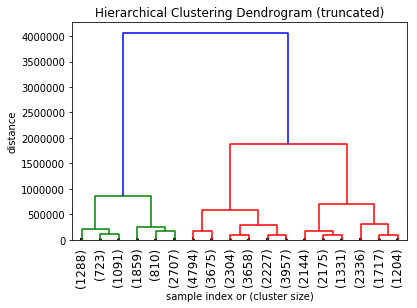

In [6]:
plt.title('Hierarchical Clustering Dendrogram (truncated)')
plt.xlabel('sample index or (cluster size)')
plt.ylabel('distance')
dendrogram(
    Z,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=18,  # show only the last p merged clusters
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,  # to get a distribution impression in truncated branches
)
plt.show()

**Full Dendogram**

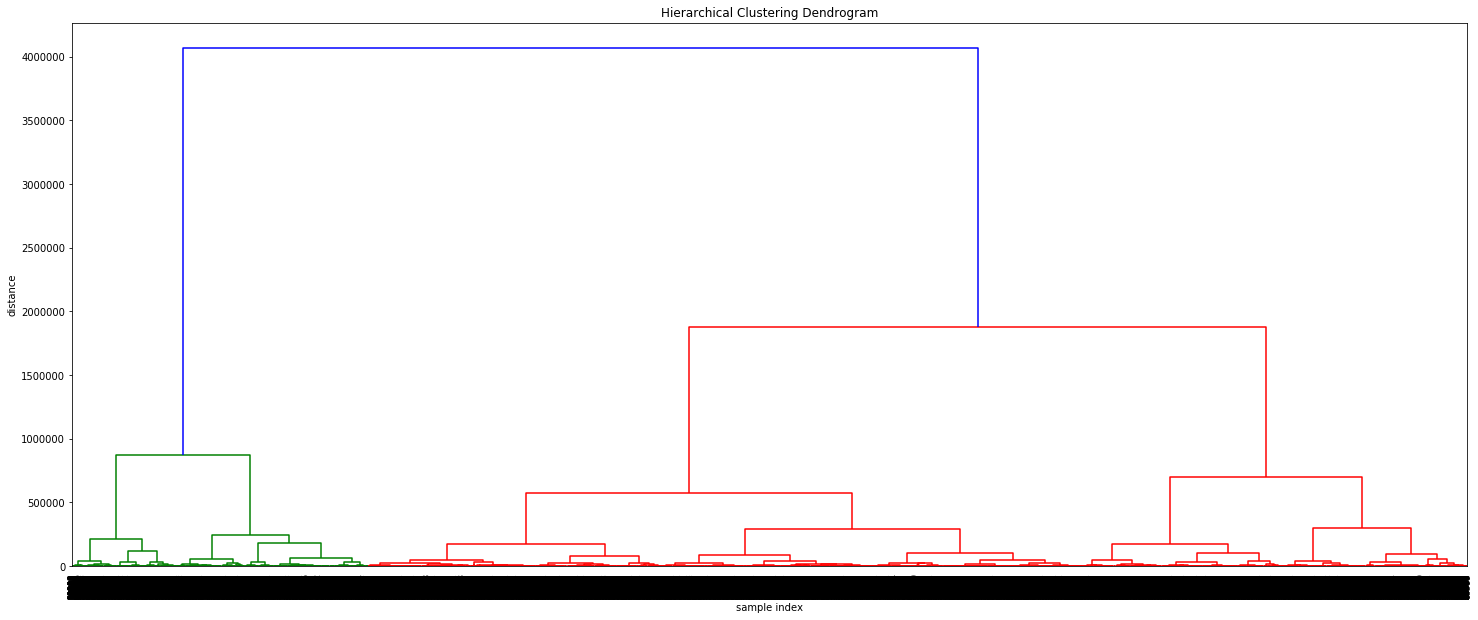

In [7]:
plt.figure(figsize=(25,10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(
    Z,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
)
plt.show()

In [8]:
#Fitting the Agglomerative Clustering Algorithm to our dataset

model = AgglomerativeClustering(n_clusters=6, affinity = 'euclidean', linkage = 'ward')
model_clusters = model.fit(data)
data['Cluster'] = model_clusters.labels_
cluster_centers = model.n_clusters

# Clusters

** Below we will analyse each cluster by looking at the average values(mean) of each variable per cluster**

In [9]:
clust_1 = data['Cluster']==0
clust_2 = data['Cluster']==1
clust_3 = data['Cluster']==2
clust_4 = data['Cluster']==3
clust_5 = data['Cluster']==4
clust_6 = data['Cluster']==5

In [13]:
cluster1 = data[clust_1].drop('Cluster',axis = 1)
cluster2 = data[clust_2].drop('Cluster',axis = 1)
cluster3 = data[clust_3].drop('Cluster',axis = 1)
cluster4 = data[clust_4].drop('Cluster',axis = 1)
cluster5 = data[clust_5].drop('Cluster',axis = 1)
cluster6 = data[clust_6].drop('Cluster',axis = 1)

### *Visualizing the clusters* 

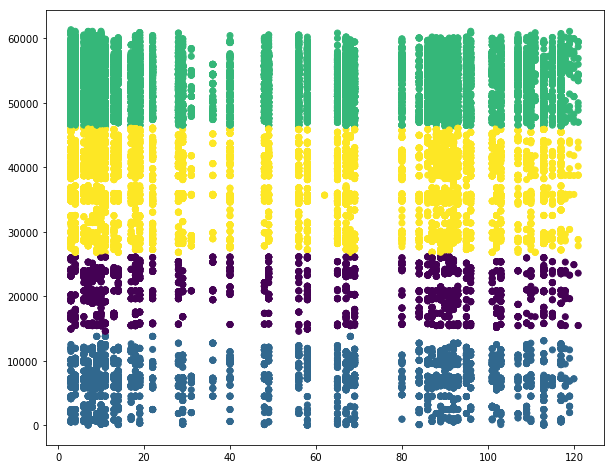

In [14]:
from scipy.cluster.hierarchy import fcluster
k=4
clusts = fcluster(Z, k, criterion='maxclust')

#Scatter Plot of the data
plt.figure(figsize=(10, 8))
plt.scatter(data.values[:,0], data.values[:,1], c=clusts)  # plot points with cluster dependent colors
plt.show()

** Let's create a dataframe of all the clusters and their average values. We will use this dataframe to understand which values are dominant in each clusters**

In [15]:
cluster1_df = pd.DataFrame(cluster1.mean(),columns=['Cluster 1'])
cluster2_df = pd.DataFrame(cluster2.mean(),columns=['Cluster 2'])
cluster3_df = pd.DataFrame(cluster3.mean(),columns=['Cluster 3'])
cluster4_df = pd.DataFrame(cluster4.mean(),columns=['Cluster 4'])
cluster5_df = pd.DataFrame(cluster5.mean(),columns=['Cluster 5'])
cluster6_df = pd.DataFrame(cluster6.mean(),columns=['Cluster 6'])

In [16]:
cluster_mix = pd.concat([cluster1_df,cluster2_df,cluster3_df,cluster4_df,cluster5_df, cluster6_df], axis=1, join_axes=[cluster1_df.index])

# Conclusion

**Below we we will look at the each feature and which have the highest average values, in attempt to analyse each cluster and its constituents.**


In [18]:
cluster_mix.sort_values(by='Cluster 1', ascending=False).drop(['Cluster 2','Cluster 3','Cluster 4','Cluster 5','Cluster 6'], axis=1)

,Cluster 1
sku_key,32200.057637
selling_price,121.161335
store_key,54.261936
sku_subdepartment_02,0.697166
avg_discount,0.417196
store_region_GTN,0.406696
store_grading_A,0.405364
sku_department_BC,0.366178
store_grading_NULL,0.326422
sku_department_TY,0.272018


**Cluster 2**

In [19]:
cluster_mix.sort_values(by='Cluster 2', ascending=False).drop(['Cluster 1','Cluster 3','Cluster 4', 'Cluster 5', 'Cluster 6'], axis=1)

,Cluster 2
sku_key,7134.593564
selling_price,163.729055
store_key,54.030506
avg_discount,1.574178
sku_subdepartment_02,0.684152
store_grading_A,0.407366
store_region_GTN,0.405320
sku_department_BC,0.396577
store_grading_NULL,0.329613
sku_department_TY,0.288132


**Cluster 3**

In [21]:
cluster_mix.sort_values(by='Cluster 3', ascending=False).drop(['Cluster 1','Cluster 2','Cluster 4', 'Cluster 5', 'Cluster 6'], axis=1)

,Cluster 3
sku_key,50433.722789
selling_price,177.601087
store_key,49.873292
avg_discount,0.877435
sku_department_TY,0.510785
store_grading_A,0.461304
store_region_GTN,0.439075
sku_subdepartment_02,0.353861
store_grading_NULL,0.295982
store_grading_B,0.228470


**Cluster 4**

In [22]:
cluster_mix.sort_values(by='Cluster 4', ascending=False).drop(['Cluster 1','Cluster 2','Cluster 3', 'Cluster 5', 'Cluster 6'], axis=1)

,Cluster 4
sku_key,20996.756931
selling_price,153.180967
store_key,55.925532
sku_subdepartment_02,0.607672
store_region_GTN,0.448420
store_grading_A,0.391038
avg_discount,0.389159
sku_department_BC,0.377498
store_grading_NULL,0.352031
sku_department_TY,0.337202


**Cluster 5**

In [23]:
cluster_mix.sort_values(by='Cluster 5', ascending=False).drop(['Cluster 1','Cluster 2','Cluster 3', 'Cluster 4', 'Cluster 6'], axis=1)

,Cluster 5
sku_key,41655.598407
selling_price,145.576628
store_key,50.691858
sku_department_TY,0.605664
avg_discount,0.584147
store_grading_A,0.449381
store_region_GTN,0.441239
store_grading_NULL,0.312566
sku_subdepartment_06,0.254513
sku_subdepartment_02,0.240000


**Cluster 6**

In [24]:
cluster_mix.sort_values(by='Cluster 6', ascending=False).drop(['Cluster 1','Cluster 2','Cluster 3', 'Cluster 5'], axis=1)

,Cluster 4,Cluster 6
sku_key,20996.756931,56217.039202
selling_price,153.180967,192.384243
store_key,55.925532,51.569489
avg_discount,0.389159,1.316523
sku_department_TY,0.337202,0.713544
store_grading_A,0.391038,0.444444
store_region_GTN,0.448420,0.417877
store_grading_NULL,0.352031,0.331562
sku_subdepartment_06,0.120567,0.294368
sales,0.312057,0.291180
